In [45]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ripple_heterogeneity.utils import functions, loading,add_new_deep_sup
from ripple_heterogeneity.assembly import (
    assembly,
    assembly_individual_epochs,
    assembly_run,
    find_sig_assembly,
    assembly_reactivation
)
import nelpy as nel
import nelpy.plotting as npl
import os
import pickle
import glob
from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib
import random
from neo.rawio import neuroscoperawio
from tqdm import tqdm
functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

In [75]:
df = pd.read_csv(r'Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv')

In [104]:
import logging
logging.getLogger().setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")
for basepath in df.basepath.unique():

    m1 = assembly_reactivation.AssemblyReact(basepath, weight_dt=0.025)
    m1.load_data()
    m1.cell_metrics = add_new_deep_sup.deep_sup_from_deepSuperficialDistance(
        m1.cell_metrics
    )
    try:
        m1.restrict_epochs_to_pre_task_post()
    except:
        continue
    try:
        m1.get_weights(epoch=m1.ripples[m1.epochs[1]])
    except
        continue
    patterns, is_member_sig, keep_assembly, is_member = find_sig_assembly.main(
        m1.patterns
    )
    assembly_df = pd.DataFrame()
    assembly_df["patterns"] = m1.patterns.ravel()
    assembly_df["is_member_sig"] = is_member.ravel()
    assembly_df["assembly_n"] = (
        (np.ones_like(m1.patterns).T * np.arange(m1.patterns.shape[0])).T.astype(int).ravel()
    )
    assembly_df["UID"] = np.tile(m1.cell_metrics.UID.values, m1.patterns.shape[0])
    assembly_df["putativeCellType"] = np.tile(
        m1.cell_metrics.putativeCellType.values, m1.patterns.shape[0]
    )
    assembly_df["brainRegion"] = np.tile(m1.cell_metrics.brainRegion.values, m1.patterns.shape[0])
    assembly_df["deepSuperficial"] = np.tile(
        m1.cell_metrics.deepSuperficial.values, m1.patterns.shape[0]
    )
    assembly_df["deepSuperficialDistance"] = np.tile(
        m1.cell_metrics.deepSuperficialDistance.values, m1.patterns.shape[0]
    )
    n_deep = []
    n_sup = []
    for n in assembly_df.assembly_n.unique():
        temp_assembly_df = assembly_df[
            (assembly_df.assembly_n == n) & (assembly_df.is_member_sig)
        ]
        n_deep.append(np.sum(temp_assembly_df.deepSuperficial == "Deep"))
        n_sup.append(np.sum(temp_assembly_df.deepSuperficial == "Superficial"))

    deep_sup_assemb_counts = (np.array(n_deep)>0)*1 - (np.array(n_sup)>0)*1

    n_deep_only = (deep_sup_assemb_counts==1).sum()
    n_sup_only = (deep_sup_assemb_counts==-1).sum()

    print(f"{basepath}: n_deep_only = {n_deep_only} n_sup_only = {n_sup_only}")


Z:\Data\AYAold\AB3\AB3_38_41: n_deep_only = 0 n_sup_only = 0
Z:\Data\AYAold\AB3\AB3_42_46: n_deep_only = 0 n_sup_only = 1
Z:\Data\AYAold\AB3\AB3_47_49: n_deep_only = 0 n_sup_only = 0
Z:\Data\AYAold\AB4\day03: n_deep_only = 1 n_sup_only = 1
Z:\Data\AYAold\AB4\day07: n_deep_only = 0 n_sup_only = 1
Z:\Data\AYAold\AB4\day09: n_deep_only = 2 n_sup_only = 0
Z:\Data\AYAold\AYA10\day12: n_deep_only = 0 n_sup_only = 0
Z:\Data\AYAold\AYA10\day25: n_deep_only = 0 n_sup_only = 0
Z:\Data\AYAold\AYA10\day27: n_deep_only = 1 n_sup_only = 0
Z:\Data\AYAold\AYA10\day31: n_deep_only = 0 n_sup_only = 0
Z:\Data\AYAold\AYA10\day32: n_deep_only = 0 n_sup_only = 0
Z:\Data\AYAold\AYA10\day34: n_deep_only = 0 n_sup_only = 1
Z:\Data\AYAold\AYA4\day150804: n_deep_only = 0 n_sup_only = 0
Z:\Data\AYAold\AYA6\day17: n_deep_only = 2 n_sup_only = 0
Z:\Data\AYAold\AYA6\day19: n_deep_only = 0 n_sup_only = 0
Z:\Data\AYAold\AYA6\day20: n_deep_only = 0 n_sup_only = 0
Z:\Data\AYAold\AYA7\day19: n_deep_only = 1 n_sup_only = 

TypeError: list indices must be integers or slices, not list

In [87]:
deep_sup_assemb_counts

array([0, 0, 1, 0, 0, 0])

In [71]:
# basepath = r"Z:\Data\AYAold\AB1\day1"
basepath = r"Z:\Data\AYAold\AB4\day03"

m1 = assembly_reactivation.AssemblyReact(basepath, weight_dt=0.025)
m1.load_data()
m1.cell_metrics = add_new_deep_sup.deep_sup_from_deepSuperficialDistance(
    m1.cell_metrics
)

m1.get_weights(epoch=m1.ripples[m1.epochs[1]])
assembly_act = m1.get_assembly_act()


In [72]:
m1.patterns.shape


(6, 58)

In [73]:
patterns, is_member_sig, keep_assembly, is_member = find_sig_assembly.main(
    m1.patterns
)
assembly_df = pd.DataFrame()
assembly_df["patterns"] = m1.patterns.ravel()
assembly_df["is_member_sig"] = is_member.ravel()
assembly_df["assembly_n"] = (
    (np.ones_like(m1.patterns).T * np.arange(m1.patterns.shape[0])).T.astype(int).ravel()
)
assembly_df["UID"] = np.tile(m1.cell_metrics.UID.values, m1.patterns.shape[0])
assembly_df["putativeCellType"] = np.tile(
    m1.cell_metrics.putativeCellType.values, m1.patterns.shape[0]
)
assembly_df["brainRegion"] = np.tile(m1.cell_metrics.brainRegion.values, m1.patterns.shape[0])
assembly_df["deepSuperficial"] = np.tile(
    m1.cell_metrics.deepSuperficial.values, m1.patterns.shape[0]
)
assembly_df["deepSuperficialDistance"] = np.tile(
    m1.cell_metrics.deepSuperficialDistance.values, m1.patterns.shape[0]
)
n_deep = []
n_sup = []
for n in assembly_df.assembly_n.unique():
    temp_assembly_df = assembly_df[
        (assembly_df.assembly_n == n) & (assembly_df.is_member_sig)
    ]
    n_deep.append(np.sum(temp_assembly_df.deepSuperficial == "Deep"))
    n_sup.append(np.sum(temp_assembly_df.deepSuperficial == "Superficial"))
    


c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars


In [74]:
n_deep,n_sup

([13, 9, 2, 7, 8, 2], [1, 6, 0, 1, 1, 1])

In [42]:
from xml.etree import ElementTree


def parse_xml_channel_groups(filename):
    filename = filename.replace(".xml", "").replace(".dat", "")

    tree = ElementTree.parse(filename + ".xml")
    root = tree.getroot()

    # find channels
    channel_group = []
    for grp_index, xml_chx in enumerate(
        root.find("anatomicalDescription").find("channelGroups").findall("group")
    ):
        for xml_rc in xml_chx:
            channel_group.append([int(xml_rc.text), grp_index])
    return np.array(channel_group)


In [47]:
reader = neuroscoperawio.NeuroScopeRawIO(r"Z:/Data/HMC1/day8/day8")
reader.parse_header()
channel_group = parse_xml_channel_groups(reader.filename)
shank = 9
channel_indexes = channel_group[channel_group[:, 1] == shank, 0]
channel_indexes = [293,314,32,416]

In [51]:
ca1_deep_idx = (
    m1.cell_metrics.brainRegion.str.contains("CA1")
    & m1.cell_metrics.deepSuperficial.str.contains("Deep")
).values
ca1_sup_idx = (
    m1.cell_metrics.brainRegion.str.contains("CA1")
    & m1.cell_metrics.deepSuperficial.str.contains("Superficial")
).values


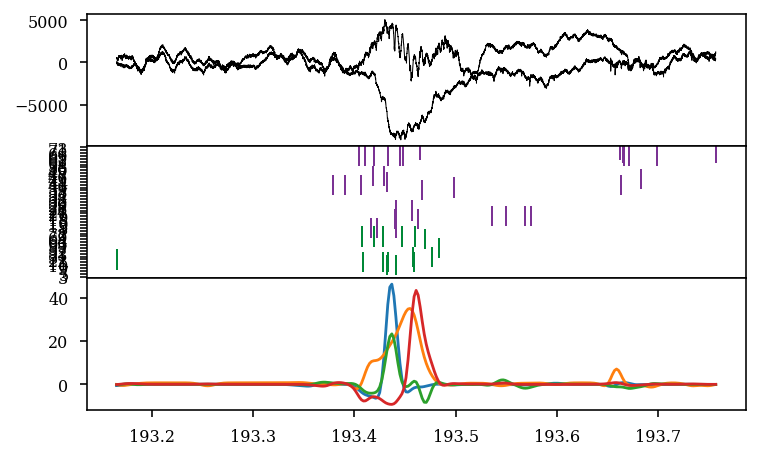

In [52]:
fig, axs = plt.subplots(
    3,
    1,
    figsize=functions.set_size("thesis", fraction=1, subplots=(1.5, 1.5)),
    edgecolor=None,
)
fig.subplots_adjust(hspace=0, wspace=0.2)
axs = axs.ravel()

group_colors = {
    "Deep": "#7b3294",
    "Superficial": "#008837",
}
# rip = 9
rip = 1358
rip = 71

window = 0.5
plotting_epoch = nel.EpochArray([np.array([m1.ripples[rip].start - window / 2, m1.ripples[rip].stop + window / 2]).T])


seconds_idx = np.array([plotting_epoch.start,plotting_epoch.stop])
# convert to index
to_idx = (seconds_idx*reader.get_signal_sampling_rate()).astype(int)
# get chunk of data
raw_sigs = reader.get_analogsignal_chunk(i_start=to_idx[0],
                                        i_stop=to_idx[1],
                                        channel_indexes=channel_indexes)
                                        
ts = np.linspace(plotting_epoch.start, plotting_epoch.stop, raw_sigs.shape[0])
axs[0].plot(ts, raw_sigs[:, 0:2], color="k", linewidth=0.5)

npl.rasterplot(
    m1.st[plotting_epoch].iloc[:, ca1_sup_idx],
    lw=1,
    lh=7,
    ax=axs[1],
    color=group_colors["Superficial"],
    vertstack=True,
)
npl.rasterplot(
    m1.st[plotting_epoch].iloc[:, ca1_deep_idx],
    lw=1,
    lh=7,
    ax=axs[1],
    color=group_colors["Deep"],
    vertstack=True,
)

axs[2].plot(
    assembly_act[plotting_epoch].abscissa_vals, assembly_act[plotting_epoch].data.T
)


In [69]:
m1.patterns.shape

(4, 74)

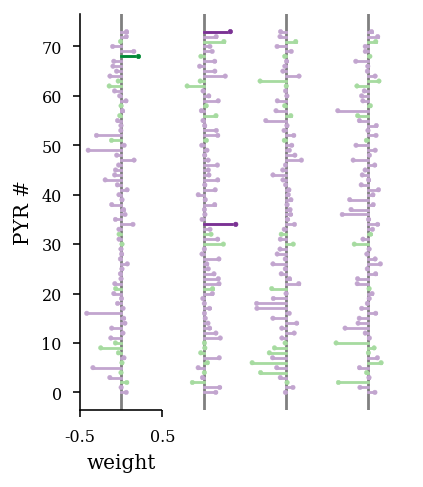

In [68]:
# first, sort cells by sublayer
sort_idx = np.argsort(m1.cell_metrics['deepSuperficial'])
# m1.cell_metrics['deepSuperficial'] = m1.cell_metrics['deepSuperficial'].iloc[sort_idx]

patterns = m1.patterns
# patterns = [pat[sort_idx] for pat in patterns]
patterns = np.array(patterns)

# get colors per sub group
colors = ['#c2a5cf']* m1.cell_metrics['deepSuperficial'].shape[0]
colors = np.array(colors)
colors[m1.cell_metrics['deepSuperficial'] == 'Deep'] = ['#c2a5cf']*sum(m1.cell_metrics['deepSuperficial'] == 'Deep')
colors[m1.cell_metrics['deepSuperficial'] == 'Superficial'] = ['#a6dba0']*sum(m1.cell_metrics['deepSuperficial'] == 'Superficial')

colors_sig = ['#7b3294']* m1.cell_metrics['deepSuperficial'].shape[0]
colors_sig = np.array(colors_sig)
colors_sig[m1.cell_metrics['deepSuperficial'] == 'Deep'] = ['#7b3294']*sum(m1.cell_metrics['deepSuperficial'] == 'Deep')
colors_sig[m1.cell_metrics['deepSuperficial'] == 'Superficial'] = ['#008837']*sum(m1.cell_metrics['deepSuperficial'] == 'Superficial')


fig, axs = plt.subplots(1,patterns.shape[0], figsize=functions.set_size('thesis', fraction=.5, subplots=(patterns.shape[0], patterns.shape[0]/2)), edgecolor='k')

fig.subplots_adjust(hspace = 0.00, wspace=0)
axs = axs.ravel()

for i,assmbl in enumerate(patterns):

    axs[i].scatter(assmbl,np.arange(len(assmbl)),c=colors,zorder=1000,s=5)

    thres = np.mean(assmbl) + np.std(assmbl)*2
    idx = assmbl > thres
    axs[i].scatter(assmbl[idx],np.arange(len(assmbl))[idx],c=colors_sig[idx],zorder=1000,s=5)

    for j,item in enumerate(assmbl):
        axs[i].plot(np.sort([item,0]),[j,j],color=colors[j],zorder=-50)
        if idx[j]:
            axs[i].plot(np.sort([item,0]),[j,j],color=colors_sig[j],zorder=-50)

    axs[i].axvline(0,color='grey',zorder=-100)

    for i in range(patterns.shape[0]):
        axs[i].set_xlim(-patterns.max()-.1,patterns.max()+.1)

    for i in range(patterns.shape[0]):
        axs[i].spines["right"].set_visible(False)
        axs[i].spines["top"].set_visible(False)  

    for i in np.arange(1,patterns.shape[0]):
        axs[i].spines["left"].set_visible(False)  
        axs[i].spines["bottom"].set_visible(False)      
        axs[i].get_yaxis().set_ticks([])
        axs[i].get_xaxis().set_ticks([])

    axs[0].set_ylabel('PYR #')
    axs[0].set_xlabel('weight')
    axs[0].set_xticks([-.5,.5])
    axs[0].set_xticklabels([-.5,.5])

In [4]:
basepath = "Z:\Data\AYAold\AB1\day1"
cell_metrics, data, ripples, fs_dat = assembly_run.load_basic_data(basepath)

restrict_idx = (
    (cell_metrics.putativeCellType == "Pyramidal Cell")
    & (cell_metrics.brainRegion.str.contains("CA1"))
    & (cell_metrics.bad_unit == False)
)

# restrict cell metrics
cell_metrics = cell_metrics[restrict_idx]

ripple_epochs = nel.EpochArray([np.array([ripples.start, ripples.stop]).T])
st_unit = nel.SpikeTrainArray(
    timestamps=np.array(data["spikes"], dtype=object)[restrict_idx], fs=fs_dat
)
# behavioral_epochs = nel.EpochArray([np.array([data['epochs'].startTime,
#                                                 data['epochs'].stopTime]).T])

filename = glob.glob(os.path.join(basepath, "*.lfp"))[0]
nChannels, fs, fs_dat, shank_to_channel = loading.loadXML(basepath)

rip_ch = ripples.ripple_channel.unique()[0]
for sh in shank_to_channel:
    if np.any(shank_to_channel[sh] == rip_ch):
        shank = sh
        break

channel_idx = np.where(shank_to_channel[shank] == rip_ch)[0][0]

lfp, ts = loading.loadLFP(
    basepath,
    n_channels=nChannels,
    channel=shank_to_channel[shank],
    frequency=fs,
    precision="int16",
)
lfp_obj = nel.AnalogSignalArray(data=lfp.T, fs=fs)


In [ ]:
session = "Z:\\home\\ryanh\\projects\\ripple_heterogeneity\\cell_assembly_v1\\Z__Data_AYAold_AB1_day1.pkl"
with open(session, "rb") as f:
    results = pickle.load(f)

z_mat, ts = assembly_run.get_z_t(st_unit)
assemblyAct = assembly.computeAssemblyActivity(
    results["patterns_inside_ripples"], z_mat
)
assembly_act = nel.AnalogSignalArray(data=assemblyAct, timestamps=ts, fs=1000)


In [9]:
results["patterns_inside_ripples"].shape, z_mat.shape


((6, 57), (58, 4209744))

In [ ]:
n_deep = []
n_sup = []

for rip in ripple_epochs:
    idx = st_unit[rip].n_events > 0
    if type(idx) != type(True):
        n_deep.append(sum(cell_metrics.deepSuperficial[idx] == "Deep"))
        n_sup.append(sum(cell_metrics.deepSuperficial[idx] == "Superficial"))
    else:
        n_deep.append(np.nan)
        n_sup.append(np.nan)


In [ ]:
# from neurodsp.filt import filter_signal
import warnings

warnings.filterwarnings("ignore")

fig, axs = plt.subplots(
    3,
    1,
    figsize=functions.set_size("thesis", fraction=1, subplots=(1.5, 1.5)),
    edgecolor="k",
)
fig.subplots_adjust(hspace=0, wspace=0.2)
axs = axs.ravel()

# rip = 9
rip = 1358
rip = 71

window = 0.5
plotting_epoch = nel.EpochArray(
    [
        np.array(
            [
                ripple_epochs[rip].start - window / 2,
                ripple_epochs[rip].stop + window / 2,
            ]
        ).T
    ]
)

# Define a frequency range to filter the data
f_range = (100, 250)
# Bandpass filter the data, across the band of interest
# sig_filt = filter_signal(lfp_obj[plotting_epoch].data[channel_idx], fs, 'bandpass', f_range)
axs[0].plot(
    lfp_obj[plotting_epoch]._abscissa_vals,
    lfp_obj[plotting_epoch].data[channel_idx],
    color="k",
    alpha=0.7,
    linewidth=0.7,
    label="ripple bandpass filtered",
)

# sort by deepSuperficial
colors1 = np.array(["#7b3294"] * cell_metrics.shape[0])
colors1[cell_metrics.deepSuperficial == "Superficial"] = "#008837"
sort_idx = np.argsort(cell_metrics["deepSuperficial"])

fr_order = np.array(st_unit[plotting_epoch].get_event_firing_order()) - 1
axs[1].eventplot(
    st_unit[plotting_epoch].data[fr_order], color=colors1[fr_order], linelengths=2
)

deep_median = []
sup_median = []
for pattern in results["patterns_inside_ripples"]:
    deep_median.append(
        np.median(pattern[(results["deepSuperficial"] == "Deep") & (pattern > 0)])
    )
    sup_median.append(
        np.median(
            pattern[(results["deepSuperficial"] == "Superficial") & (pattern > 0)]
        )
    )

ratio = (np.array(sup_median) - np.array(deep_median)) / (
    np.array(sup_median) + np.array(deep_median)
)
norm = matplotlib.colors.Normalize(vmin=ratio.min(), vmax=ratio.max())
cmap = matplotlib.cm.get_cmap("PRGn")
rgba = cmap(norm(ratio))
for i, c in enumerate(rgba):
    axs[2].plot(
        assembly_act[plotting_epoch].abscissa_vals,
        assembly_act[plotting_epoch].data[i],
        color=c,
    )

axins = inset_axes(axs[2], width="2%", height="75%", loc="right", borderpad=-1.5)
sm = plt.cm.ScalarMappable(cmap="PRGn", norm=plt.Normalize(vmin=-1, vmax=1))
cbar = fig.colorbar(sm, cax=axins, ticks=[-1, 0, 1])
cbar.outline.set_visible(False)
cbar.ax.set_yticklabels(["Deep", "mixed", "Superficial"], fontsize=6)
axins.set_ylabel("Assembly \n membership", fontsize=7)

for rip in ripple_epochs[plotting_epoch]:
    axs[0].axvspan(rip.start, rip.stop, color="grey", alpha=0.25, zorder=-1000)
    axs[1].axvspan(rip.start, rip.stop, color="grey", alpha=0.25, zorder=-1000)
    axs[2].axvspan(rip.start, rip.stop, color="grey", alpha=0.25, zorder=-1000)

x = np.linspace(plotting_epoch.start, plotting_epoch.stop, 4)
axs[2].set_xticks(x)
axs[2].set_xticklabels(np.round(x - plotting_epoch.start, 2))

axs[1].set_yticks(np.linspace(0, cell_metrics.UID.unique().shape[0], 4))
axs[1].set_ylim(-2, cell_metrics.UID.unique().shape[0])
axs[1].set_ylabel("Unit ID")

axs[2].set_xlabel("time (sec)")
axs[2].set_ylabel("Assembly \n strength")

for i in range(3):
    axs[i].spines["top"].set_visible(False)
    axs[i].spines["right"].set_visible(False)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].set_xlim(plotting_epoch.start, plotting_epoch.stop)

axs[0].axes.xaxis.set_visible(False)
axs[0].axes.yaxis.set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[0].spines["bottom"].set_visible(False)
axs[0].spines["right"].set_visible(False)
axs[0].spines["left"].set_visible(False)

axs[1].spines["bottom"].set_visible(False)

axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[2].yaxis.set_minor_locator(AutoMinorLocator())
axs[2].xaxis.set_minor_locator(AutoMinorLocator())

# plt.savefig(os.path.join(fig_save_path,'ripple_deep_sup_example_v2.svg'),dpi=300,bbox_inches='tight')
